## code to extract precipitation for each municipality in Colombia between 2007 and 2018
* golbal precipitation maps from WorldClim: https://www.worldclim.org/data/worldclim21.html
* Municipalities from DANE: https://geoportal.dane.gov.co/geovisores/territorio/consulta-divipola-division-politico-administrativa-de-colombia/
* Built in google collab using R as language
* Authors: 
  - ** David Restrepo: dsrestrepo@unicauca.edu.co **
  - ** Dana Moukheiber: mdana3474@gmail.com **

In [28]:
#connect with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [30]:
%%R
#  install the libraries
install.packages("raster")
install.packages("maptools")
install.packages("rgdal")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/raster_3.4-5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 575921 bytes (562 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [31]:
%%R
# load the libraries
library(raster)
library(maptools)
library(rgdal)

# data taken from:
* worldclim: https://www.worldclim.org/data/worldclim21.html

You'll find .zip files, each .zip file when is unziped contains a folder with data in .tif format of a specific data for example in this case precipitation. 
There is a file for each month, between the years specified in the folder

## Data of 2018 precipitation 2018

In [32]:
%%R
#precipitation 2018
#Read each file as a raster
map_prec_jan_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-01.tif")
map_prec_feb_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-02.tif")
map_prec_mar_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-03.tif")
map_prec_apr_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-04.tif")
map_prec_may_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-05.tif")
map_prec_jun_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-06.tif")
map_prec_jul_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-07.tif")
map_prec_aug_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-08.tif")
map_prec_sep_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-09.tif")
map_prec_oct_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-10.tif")
map_prec_nov_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-11.tif")
map_prec_dec_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2018-12.tif")

OGR data source with driver: ESRI Shapefile 
Source: "/content/drive/MyDrive/Dengue_MAPS/polygons/MPM/shapefile/MPM_FuenteCensal_2018.shp", layer: "MPM_FuenteCensal_2018"
with 1122 features
It has 53 fields


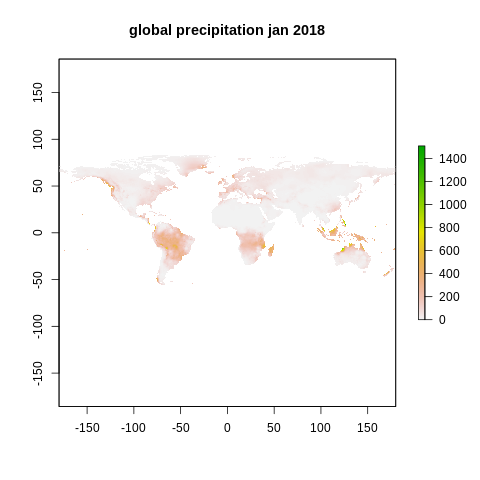

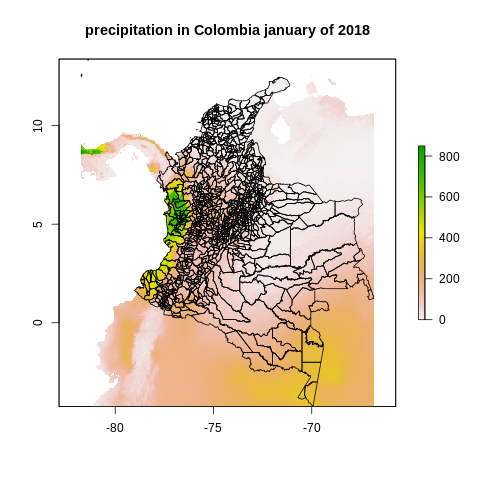

In [33]:
%%R
# Each file looks like this:
plot(map_prec_jan_18, main = "global precipitation jan 2018")

# and we apply do apperations like sum, divide, etc, or cut to take just a specific region like:

# load a polygon (municipalities)
colombian_map <- readOGR("/content/drive/MyDrive/Dengue_MAPS/polygons/MPM/shapefile/MPM_FuenteCensal_2018.shp")

# cut map to obtain colombian map of precipitation
map_precipitation_colombia_jan_18 <- crop(map_prec_jan_18, colombian_map)
plot(map_precipitation_colombia_jan_18, main = "precipitation in Colombia january of 2018")
plot(colombian_map, add = TRUE)


# load the municipalities dataframe to take the value in each munucipality:
Data taken from:
* DANE: https://geoportal.dane.gov.co/geovisores/territorio/consulta-divipola-division-politico-administrativa-de-colombia/

In [34]:
%%R
# Read coordinates csv
municipalities_df <- read.csv('/content/drive/MyDrive/Dengue_MAPS/polygons/DIVIPOLA_Municipios.csv', header = TRUE, sep = ";")

# Data preprocessing
municipalities_df = na.omit(municipalities_df)

#Fix DPTO names 
municipalities_df$NOM_DPTO = gsub("\xc1", "A", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xc9", "E", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xcd", "I", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xd3", "O", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xda", "U", municipalities_df$NOM_DPTO) 
municipalities_df$NOM_DPTO = gsub("\xd1", "N", municipalities_df$NOM_DPTO)

#Fix MPIO names
municipalities_df$NOM_MPIO = gsub("\xc1", "A", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xc9", "E", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xcd", "I", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xd3", "O", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xda", "U", municipalities_df$NOM_MPIO) # pendiente
municipalities_df$NOM_MPIO = gsub("\xd1", "N", municipalities_df$NOM_MPIO)


#Fix coordinates
#change , by .
municipalities_df$LONGITUD = gsub(",", ".", municipalities_df$LONGITUD)
municipalities_df$LATITUD = gsub(",", ".", municipalities_df$LATITUD)

#change coordinates from string to numeric
municipalities_df[,'LONGITUD'] = as.numeric(municipalities_df[,'LONGITUD'])
municipalities_df[,'LATITUD'] = as.numeric(municipalities_df[,'LATITUD'])
head(municipalities_df)

  COD_DPTO  NOM_DPTO COD_MPIO   NOM_MPIO      TIPO  LATITUD  LONGITUD
1        5 ANTIOQUIA     5001   MEDELLIN Municipio 6.257590 -75.61103
2        5 ANTIOQUIA     5002  ABEJORRAL Municipio 5.803728 -75.43847
3        5 ANTIOQUIA     5004   ABRIAQUI Municipio 6.627569 -76.08598
4        5 ANTIOQUIA     5021 ALEJANDRIA Municipio 6.365534 -75.09060
5        5 ANTIOQUIA     5030      AMAGA Municipio 6.032922 -75.70800
6        5 ANTIOQUIA     5031     AMALFI Municipio 6.977789 -74.98124


# Extract data from 2018

In [35]:
%%R

# Extracting data of pracipitation in january for each municipality 
precipitation_aux_df = extract(map_prec_jan_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
# Append that data of precipitation to municipalities
precipitation_df = cbind(precipitation_aux_df, municipalities_df)
# Rename
colnames(precipitation_df)[2] = "PRECIPITATION_jan_18"
# Delete the id column
precipitation_df = subset (precipitation_df, select = -ID)
head(precipitation_df,10)


   PRECIPITATION_jan_18 COD_DPTO  NOM_DPTO COD_MPIO    NOM_MPIO      TIPO
1             131.17673        5 ANTIOQUIA     5001    MEDELLIN Municipio
2             151.62598        5 ANTIOQUIA     5002   ABEJORRAL Municipio
3              98.84801        5 ANTIOQUIA     5004    ABRIAQUI Municipio
4             140.21700        5 ANTIOQUIA     5021  ALEJANDRIA Municipio
5             123.73676        5 ANTIOQUIA     5030       AMAGA Municipio
6             150.04190        5 ANTIOQUIA     5031      AMALFI Municipio
7             212.67816        5 ANTIOQUIA     5034       ANDES Municipio
8             137.96474        5 ANTIOQUIA     5036 ANGELOPOLIS Municipio
9             101.99107        5 ANTIOQUIA     5038   ANGOSTURA Municipio
10            118.07809        5 ANTIOQUIA     5040       ANORI Municipio
    LATITUD  LONGITUD
1  6.257590 -75.61103
2  5.803728 -75.43847
3  6.627569 -76.08598
4  6.365534 -75.09060
5  6.032922 -75.70800
6  6.977789 -74.98124
7  5.604993 -75.94128
8  6.12143

In [ ]:
%%R
# Feb
precipitation_aux_df = extract(map_prec_feb_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_18"
precipitation_df = subset (precipitation_df, select = -ID)

# Mar
precipitation_aux_df = extract(map_prec_mar_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_18"
precipitation_df = subset (precipitation_df, select = -ID)

# Apr
precipitation_aux_df = extract(map_prec_apr_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_18"
precipitation_df = subset (precipitation_df, select = -ID)

# May
precipitation_aux_df = extract(map_prec_may_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_18"
precipitation_df = subset (precipitation_df, select = -ID)

# Jun
precipitation_aux_df = extract(map_prec_jun_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_18"
precipitation_df = subset (precipitation_df, select = -ID)

# Jul
precipitation_aux_df = extract(map_prec_jul_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_18"
precipitation_df = subset (precipitation_df, select = -ID)

# Aug
precipitation_aux_df = extract(map_prec_aug_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_18"

precipitation_df = subset (precipitation_df, select = -ID)

# Sep
precipitation_aux_df = extract(map_prec_sep_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_18"
precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_18"
precipitation_df = subset (precipitation_df, select = -ID)

# Nov
precipitation_aux_df = extract(map_prec_nov_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_18"
precipitation_df = subset (precipitation_df, select = -ID)

# Dec
precipitation_aux_df = extract(map_prec_dec_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_18"
precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2017

In [ ]:
%%R
#precipitation 2017
map_prec_jan_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-01.tif")
map_prec_feb_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-02.tif")
map_prec_mar_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-03.tif")
map_prec_apr_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-04.tif")
map_prec_may_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-05.tif")
map_prec_jun_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-06.tif")
map_prec_jul_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-07.tif")
map_prec_aug_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-08.tif")
map_prec_sep_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-09.tif")
map_prec_oct_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-10.tif")
map_prec_nov_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-11.tif")
map_prec_dec_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2017-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_17"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_17"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_17"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_17"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_17"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_17"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_17"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_17"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_17"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_17"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_17"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_17"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2016

In [ ]:
%%R
#precipitation 2016
map_prec_jan_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-01.tif")
map_prec_feb_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-02.tif")
map_prec_mar_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-03.tif")
map_prec_apr_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-04.tif")
map_prec_may_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-05.tif")
map_prec_jun_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-06.tif")
map_prec_jul_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-07.tif")
map_prec_aug_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-08.tif")
map_prec_sep_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-09.tif")
map_prec_oct_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-10.tif")
map_prec_nov_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-11.tif")
map_prec_dec_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2016-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_16"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_16"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_16"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_16"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_16"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_16"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_16"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_16"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_16"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_16"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_16"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_16"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2015

In [ ]:
%%R
#precipitation 2015
map_prec_jan_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-01.tif")
map_prec_feb_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-02.tif")
map_prec_mar_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-03.tif")
map_prec_apr_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-04.tif")
map_prec_may_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-05.tif")
map_prec_jun_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-06.tif")
map_prec_jul_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-07.tif")
map_prec_aug_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-08.tif")
map_prec_sep_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-09.tif")
map_prec_oct_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-10.tif")
map_prec_nov_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-11.tif")
map_prec_dec_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2015-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_15"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_15"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_15"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_15"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_15"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_15"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_15"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_15"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_15"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_15"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_15"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_15"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2014

In [ ]:
%%R
#precipitation 2014
map_prec_jan_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-01.tif")
map_prec_feb_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-02.tif")
map_prec_mar_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-03.tif")
map_prec_apr_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-04.tif")
map_prec_may_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-05.tif")
map_prec_jun_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-06.tif")
map_prec_jul_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-07.tif")
map_prec_aug_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-08.tif")
map_prec_sep_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-09.tif")
map_prec_oct_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-10.tif")
map_prec_nov_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-11.tif")
map_prec_dec_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2014-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_14"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_14"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_14"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_14"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_14"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_14"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_14"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_14"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_14"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_14"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_14"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_14"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2013

In [ ]:
%%R
#precipitation 2013
map_prec_jan_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-01.tif")
map_prec_feb_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-02.tif")
map_prec_mar_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-03.tif")
map_prec_apr_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-04.tif")
map_prec_may_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-05.tif")
map_prec_jun_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-06.tif")
map_prec_jul_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-07.tif")
map_prec_aug_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-08.tif")
map_prec_sep_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-09.tif")
map_prec_oct_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-10.tif")
map_prec_nov_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-11.tif")
map_prec_dec_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2013-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_13"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_13"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_13"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_13"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_13"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_13"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_13"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_13"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_13"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_13"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_13"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_13"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2012

In [ ]:
%%R
#precipitation 2012
map_prec_jan_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-01.tif")
map_prec_feb_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-02.tif")
map_prec_mar_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-03.tif")
map_prec_apr_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-04.tif")
map_prec_may_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-05.tif")
map_prec_jun_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-06.tif")
map_prec_jul_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-07.tif")
map_prec_aug_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-08.tif")
map_prec_sep_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-09.tif")
map_prec_oct_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-10.tif")
map_prec_nov_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-11.tif")
map_prec_dec_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2012-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_12"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_12"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_12"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_12"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_12"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_12"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_12"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_12"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_12"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_12"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_12"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_12"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2011

In [ ]:
%%R
#precipitation 2011
map_prec_jan_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-01.tif")
map_prec_feb_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-02.tif")
map_prec_mar_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-03.tif")
map_prec_apr_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-04.tif")
map_prec_may_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-05.tif")
map_prec_jun_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-06.tif")
map_prec_jul_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-07.tif")
map_prec_aug_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-08.tif")
map_prec_sep_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-09.tif")
map_prec_oct_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-10.tif")
map_prec_nov_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-11.tif")
map_prec_dec_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2011-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_11"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_11"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_11"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_11"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_11"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_11"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_11"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_11"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_11"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_11"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_11"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_11"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2010

In [ ]:
%%R
#precipitation 2010
map_prec_jan_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-01.tif")
map_prec_feb_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-02.tif")
map_prec_mar_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-03.tif")
map_prec_apr_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-04.tif")
map_prec_may_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-05.tif")
map_prec_jun_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-06.tif")
map_prec_jul_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-07.tif")
map_prec_aug_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-08.tif")
map_prec_sep_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-09.tif")
map_prec_oct_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-10.tif")
map_prec_nov_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-11.tif")
map_prec_dec_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2010-2018 (Unizipped)/wc2.1_2.5m_prec_2010-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_10"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_10"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_10"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_10"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_10"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_10"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_10"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_10"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_10"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_10"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_10"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_10"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2009

In [ ]:
%%R
#precipitation 2009
map_prec_jan_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-01.tif")
map_prec_feb_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-02.tif")
map_prec_mar_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-03.tif")
map_prec_apr_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-04.tif")
map_prec_may_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-05.tif")
map_prec_jun_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-06.tif")
map_prec_jul_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-07.tif")
map_prec_aug_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-08.tif")
map_prec_sep_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-09.tif")
map_prec_oct_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-10.tif")
map_prec_nov_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-11.tif")
map_prec_dec_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2009-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_09"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_09"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_09"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_09"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_09"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_09"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_09"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_09"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_09"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_09"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_09"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_09"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2008

In [ ]:
%%R
#precipitation 2008
map_prec_jan_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-01.tif")
map_prec_feb_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-02.tif")
map_prec_mar_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-03.tif")
map_prec_apr_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-04.tif")
map_prec_may_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-05.tif")
map_prec_jun_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-06.tif")
map_prec_jul_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-07.tif")
map_prec_aug_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-08.tif")
map_prec_sep_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-09.tif")
map_prec_oct_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-10.tif")
map_prec_nov_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-11.tif")
map_prec_dec_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2008-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_08"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_08"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_08"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_08"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_08"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_08"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_08"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_08"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_08"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_08"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_08"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_08"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Extract data from 2007

In [ ]:
%%R
#precipitation 2007
map_prec_jan_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-01.tif")
map_prec_feb_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-02.tif")
map_prec_mar_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-03.tif")
map_prec_apr_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-04.tif")
map_prec_may_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-05.tif")
map_prec_jun_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-06.tif")
map_prec_jul_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-07.tif")
map_prec_aug_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-08.tif")
map_prec_sep_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-09.tif")
map_prec_oct_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-10.tif")
map_prec_nov_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-11.tif")
map_prec_dec_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_prec_2000-2009 (Unizipped)/wc2.1_2.5m_prec_2007-12.tif")

In [ ]:
%%R
# Extracting data
#jan
precipitation_aux_df = extract(map_prec_jan_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jan_07"

precipitation_df = subset (precipitation_df, select = -ID)

#feb
precipitation_aux_df = extract(map_prec_feb_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_feb_07"

precipitation_df = subset (precipitation_df, select = -ID)

#mar
precipitation_aux_df = extract(map_prec_mar_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_mar_07"

precipitation_df = subset (precipitation_df, select = -ID)

#apr
precipitation_aux_df = extract(map_prec_apr_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_apr_07"

precipitation_df = subset (precipitation_df, select = -ID)

#may
precipitation_aux_df = extract(map_prec_may_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_may_07"

precipitation_df = subset (precipitation_df, select = -ID)

#jun
precipitation_aux_df = extract(map_prec_jun_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jun_07"

precipitation_df = subset (precipitation_df, select = -ID)

#jul
precipitation_aux_df = extract(map_prec_jul_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_jul_07"

precipitation_df = subset (precipitation_df, select = -ID)

#aug
precipitation_aux_df = extract(map_prec_aug_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_aug_07"

precipitation_df = subset (precipitation_df, select = -ID)

#sep
precipitation_aux_df = extract(map_prec_sep_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_sep_07"

precipitation_df = subset (precipitation_df, select = -ID)

#oct
precipitation_aux_df = extract(map_prec_oct_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_oct_07"

precipitation_df = subset (precipitation_df, select = -ID)

#nov
precipitation_aux_df = extract(map_prec_nov_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_nov_07"

precipitation_df = subset (precipitation_df, select = -ID)

#dec
precipitation_aux_df = extract(map_prec_dec_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
precipitation_df = cbind(precipitation_aux_df, precipitation_df)
colnames(precipitation_df)[2] = "PRECIPITATION_dec_07"

precipitation_df = subset (precipitation_df, select = -ID)

head(precipitation_df,10)

# Download Data

In [26]:
%%R
# Download data 2007 - 2018
write.csv(precipitation_df, "precipitation_2007_2018.csv")

NULL
